In [ ]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import requests
from IPython.display import HTML
from bs4 import BeautifulSoup
import yfinance as yf


In [ ]:
news_url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&apikey=5UI2745P09J39YGE'

In [ ]:
response = requests.get(news_url)
response

<Response [200]>

In [ ]:
response.text[:1000]

'{\n    "items": "50",\n    "sentiment_score_definition": "x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish",\n    "relevance_score_definition": "0 < x <= 1, with a higher score indicating higher relevance.",\n    "feed": [\n        {\n            "title": "Warner Bros. Discovery Raises Streaming Prices A Month After CEO Said Plans Were \'Way Underpriced\' - Warner Bros. Discovery  ( NASDAQ:WBD ) ",\n            "url": "https://www.benzinga.com/news/entertainment/25/10/48369915/warner-bros-discovery-raises-streaming-prices-a-month-after-ceo-said-plans-were-way-underprice",\n            "time_published": "20251022T224347",\n            "authors": [\n                "Chris Katje"\n            ],\n            "summary": "In a move that could be called nothing less than foreshadowing, Warner Bros. Discovery ( NASDAQ:WBD ) has raised the price of its streaming platform a month after its CEO said it w

In [ ]:
data = response.json()
data

{'items': '50',
 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish',
 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.',
 'feed': [{'title': "Warner Bros. Discovery Raises Streaming Prices A Month After CEO Said Plans Were 'Way Underpriced' - Warner Bros. Discovery  ( NASDAQ:WBD ) ",
   'url': 'https://www.benzinga.com/news/entertainment/25/10/48369915/warner-bros-discovery-raises-streaming-prices-a-month-after-ceo-said-plans-were-way-underprice',
   'time_published': '20251022T224347',
   'authors': ['Chris Katje'],
   'summary': 'In a move that could be called nothing less than foreshadowing, Warner Bros. Discovery ( NASDAQ:WBD ) has raised the price of its streaming platform a month after its CEO said it was underpriced. The increased prices for consumers come as the media company is also exploring selling itself to ...'

In [ ]:
data.values()

dict_values(['50', 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish', '0 < x <= 1, with a higher score indicating higher relevance.', [{'title': "Warner Bros. Discovery Raises Streaming Prices A Month After CEO Said Plans Were 'Way Underpriced' - Warner Bros. Discovery  ( NASDAQ:WBD ) ", 'url': 'https://www.benzinga.com/news/entertainment/25/10/48369915/warner-bros-discovery-raises-streaming-prices-a-month-after-ceo-said-plans-were-way-underprice', 'time_published': '20251022T224347', 'authors': ['Chris Katje'], 'summary': 'In a move that could be called nothing less than foreshadowing, Warner Bros. Discovery ( NASDAQ:WBD ) has raised the price of its streaming platform a month after its CEO said it was underpriced. The increased prices for consumers come as the media company is also exploring selling itself to ...', 'banner_image': 'https://cdn.benzinga.com/files/images/story/2025/10/22/Warner

In [ ]:
news_items = data.get('feed', [])
sorted_news = sorted(news_items, key=lambda x: float(x.get('relevance_score', 0)), reverse=True)

for item in sorted_news:
    print(f"Title: {item.get('title')}, Relevance Score: {item.get('relevance_score')}") # this is just the code sorted by their relevace scores

Title: Warner Bros. Discovery Raises Streaming Prices A Month After CEO Said Plans Were 'Way Underpriced' - Warner Bros. Discovery  ( NASDAQ:WBD ) , Relevance Score: None
Title: What's Going On With The Drop In Apple Stock Today? - Apple  ( NASDAQ:AAPL ) , Relevance Score: None
Title: The Mag 7 Stock Charts: Which are Hot?, Relevance Score: None
Title: MSFT vs. AAPL: Which Mega-Cap Tech Stock is the Better Buy Now?, Relevance Score: None
Title: Gold Drops After Blow-Off Top Signal; Netflix Disappoints; Tesla Earnings Ahead - Apple  ( NASDAQ:AAPL ) , Relevance Score: None
Title: NFLX Q3 Earnings Miss on Brazilian Tax Dispute, Posts Record Ad Sales, Relevance Score: None
Title: Market Analysis: Apple And Competitors In Technology Hardware, Storage & Peripherals Industry - Apple  ( NASDAQ:AAPL ) , Relevance Score: None
Title: The Zacks Analyst Blog Highlights Apple, Meta Platforms, JPMorgan Chase and AstroNova, Relevance Score: None
Title: Apple Reportedly Cuts iPhone Air Production, Ramp

In [ ]:
news_items = data.get('feed', [])
df = pd.DataFrame(news_items)

In [ ]:
df['relevance_score'] = pd.to_numeric(df.get('relevance_score', 0), errors='coerce')
df['sentiment_score'] = pd.to_numeric(df.get('sentiment_score', 0), errors='coerce')

In [ ]:
df_sorted = df.sort_values(by=['relevance_score', 'sentiment_score'], ascending=False)


In [ ]:
top_n = 5
top_articles = df_sorted.head(top_n)
top_n = 10
top_articles = df_sorted.head(top_n)

for _, row in top_articles.iterrows():
    print(f"Title: {row['title']}, URL: {row['url']}, Relevance Score: {row['relevance_score']}, Sentiment Score: {row['sentiment_score']}")

Title: Warner Bros. Discovery Raises Streaming Prices A Month After CEO Said Plans Were 'Way Underpriced' - Warner Bros. Discovery  ( NASDAQ:WBD ) , URL: https://www.benzinga.com/news/entertainment/25/10/48369915/warner-bros-discovery-raises-streaming-prices-a-month-after-ceo-said-plans-were-way-underprice, Relevance Score: 0, Sentiment Score: 0
Title: What's Going On With The Drop In Apple Stock Today? - Apple  ( NASDAQ:AAPL ) , URL: https://www.benzinga.com/trading-ideas/movers/25/10/48361867/whats-going-on-with-the-drop-in-apple-stock-today, Relevance Score: 0, Sentiment Score: 0
Title: The Mag 7 Stock Charts: Which are Hot?, URL: https://www.zacks.com/commentary/2774466/the-mag-7-stock-charts-which-are-hot, Relevance Score: 0, Sentiment Score: 0
Title: MSFT vs. AAPL: Which Mega-Cap Tech Stock is the Better Buy Now?, URL: https://www.zacks.com/stock/news/2774470/msft-vs-aapl-which-mega-cap-tech-stock-is-the-better-buy-now, Relevance Score: 0, Sentiment Score: 0
Title: Gold Drops Aft

In [ ]:
from collections import Counter
ticker_mentions = []
for item in news_items:
    if 'ticker_sentiment' in item:
        for ticker_info in item['ticker_sentiment']:
            ticker_mentions.append(ticker_info['ticker'])

We sorted by  sentiment and relevance score, and then found the most mentioned ticker across all the data.


---



In [ ]:
ticker_counts = Counter(ticker_mentions)
print("Ticker mention counts:")
for ticker, count in ticker_counts.most_common(10):
    print(f"{ticker}: {count} mentions")

Ticker mention counts:
AAPL: 50 mentions
MSFT: 18 mentions
NVDA: 17 mentions
META: 10 mentions
TSLA: 9 mentions
GOOG: 8 mentions
AMZN: 7 mentions
IVZ: 6 mentions
TSM: 5 mentions
NFLX: 4 mentions


In [ ]:
most_mentioned_ticker = ticker_counts.most_common(1)[0][0]
print(f"\nMost mentioned ticker: {most_mentioned_ticker}")


Most mentioned ticker: AAPL


In [ ]:
#Pulling financial data for most mentioned ticker

ticker = most_mentioned_ticker
stock = yf.Ticker(ticker)

income_stmt = stock.financials
balance_sheet = stock.balance_sheet
cash_flow = stock.cashflow

print(f"\n=== Financial Data for {ticker} ===")
print("\nIncome Statement (most recent year):")
print(income_stmt.iloc[:, 0])


=== Financial Data for AAPL ===

Income Statement (most recent year):
Tax Effect Of Unusual Items                                   0.000000e+00
Tax Rate For Calcs                                            2.410000e-01
Normalized EBITDA                                             1.346610e+11
Net Income From Continuing Operation Net Minority Interest    9.373600e+10
Reconciled Depreciation                                       1.144500e+10
Reconciled Cost Of Revenue                                    2.103520e+11
EBITDA                                                        1.346610e+11
EBIT                                                          1.232160e+11
Net Interest Income                                                    NaN
Interest Expense                                                       NaN
Interest Income                                                        NaN
Normalized Income                                             9.373600e+10
Net Income From Continuing An

In [ ]:
ticker = most_mentioned_ticker
stock = yf.Ticker(ticker)

# obtaining financial statements
income_stmt = stock.financials
balance_sheet = stock.balance_sheet
cash_flow = stock.cashflow

print(f"\n=== Financial Data for {ticker} ===")
print("\nIncome Statement (most recent year):")
print(income_stmt.iloc[:, 0])

# DCF valuation
def dcf_value(ticker, growth_rate=0.05, discount_rate=0.10, terminal_growth=0.02, years=5):
    """
    Perform a DCF valuation

    Parameters:
    - growth_rate: Expected growth rate (default 5%)
    - discount_rate: WACC/discount rate (default 10%)
    - terminal_growth: Perpetual growth rate (default 2%)
    - years: Projection period (default 5 years)
    """

    stock = yf.Ticker(ticker)

    cf = stock.cashflow

    try:
        # Try to get Operating Cash Flow and CapEx
        operating_cf = cf.loc['Operating Cash Flow'].iloc[0]
        capex = cf.loc['Capital Expenditure'].iloc[0]
        current_fcf = operating_cf + capex  # CapEx is negative

    except:
        print("Could not calculate FCF directly. Using approximation.")
        current_fcf = cf.loc['Free Cash Flow'].iloc[0] if 'Free Cash Flow' in cf.index else None

    if current_fcf is None or pd.isna(current_fcf):
        return None, "Unable to calculate FCF"

    print(f"Current Free Cash Flow: ${current_fcf:,.0f}")

    # Project future cash flows
    projected_fcf = []
    for year in range(1, years + 1):
        fcf = current_fcf * ((1 + growth_rate) ** year)
        projected_fcf.append(fcf)
        print(f"Year {year} projected FCF: ${fcf:,.0f}")

    # Calculate present value of projected cash flows
    pv_fcf = []
    for year, fcf in enumerate(projected_fcf, 1):
        pv = fcf / ((1 + discount_rate) ** year)
        pv_fcf.append(pv)

    sum_pv_fcf = sum(pv_fcf)
    print(f"\nSum of PV of projected FCFs: ${sum_pv_fcf:,.0f}")

    #terminal value
    terminal_fcf = projected_fcf[-1] * (1 + terminal_growth)
    terminal_value = terminal_fcf / (discount_rate - terminal_growth)
    pv_terminal_value = terminal_value / ((1 + discount_rate) ** years)

    print(f"Terminal Value: ${terminal_value:,.0f}")
    print(f"PV of Terminal Value: ${pv_terminal_value:,.0f}")

    #Calculating the enterprise value
    enterprise_value = sum_pv_fcf + pv_terminal_value
    print(f"\nEnterprise Value: ${enterprise_value:,.0f}")

    # Obtaining balance sheet data for equity value calculation
    bs = stock.balance_sheet

    try:
        cash = bs.loc['Cash And Cash Equivalents'].iloc[0] if 'Cash And Cash Equivalents' in bs.index else 0
        debt = bs.loc['Total Debt'].iloc[0] if 'Total Debt' in bs.index else 0

        # Calculating the  Equity Value
        equity_value = enterprise_value + cash - debt
        print(f"Cash: ${cash:,.0f}")
        print(f"Debt: ${debt:,.0f}")
        print(f"Equity Value: ${equity_value:,.0f}")

        # Obtaining shares outstanding
        shares_outstanding = stock.info.get('sharesOutstanding', None)

        if shares_outstanding:
            fair_value_per_share = equity_value / shares_outstanding
            current_price = stock.info.get('currentPrice', None)

            print(f"\nShares Outstanding: {shares_outstanding:,.0f}")
            print(f"Fair Value per Share: ${fair_value_per_share:.2f}")
            print(f"Current Price: ${current_price:.2f}")

            if current_price:
                upside = ((fair_value_per_share - current_price) / current_price) * 100
                print(f"Upside/Downside: {upside:.2f}%")

            return fair_value_per_share, current_price

    except Exception as e:
        print(f"Error in equity value calculation: {e}")
        return None, None

    return None, None

print(f"\n{'='*60}")
print(f"DCF VALUATION FOR {most_mentioned_ticker}")
print(f"{'='*60}\n")

fair_value, current_price = dcf_value(
    most_mentioned_ticker,
    growth_rate=0.05,
    discount_rate=0.10,
    terminal_growth=0.02,
    years=5)


=== Financial Data for AAPL ===

Income Statement (most recent year):
Tax Effect Of Unusual Items                                   0.000000e+00
Tax Rate For Calcs                                            2.410000e-01
Normalized EBITDA                                             1.346610e+11
Net Income From Continuing Operation Net Minority Interest    9.373600e+10
Reconciled Depreciation                                       1.144500e+10
Reconciled Cost Of Revenue                                    2.103520e+11
EBITDA                                                        1.346610e+11
EBIT                                                          1.232160e+11
Net Interest Income                                                    NaN
Interest Expense                                                       NaN
Interest Income                                                        NaN
Normalized Income                                             9.373600e+10
Net Income From Continuing An

We used a DCF model to estimate Apple's true value based on its future earnings. It's like calculating how much a business is worth based on the money it will make in the years ahead.
Our calculation showed Apple should be worth about $101 per share,
but it is currently trading at 258 dollars per share. This big difference, about 61% lower than the market price, suggests Apple might be overvalued based on our assumptions. However, since our model uses several conservative assumptions, this gap likely reveals more about the limitations of our model than it does about Apple being overvalued.


We chose to use a 5% growth rate in our DCF model (instead of 8.1%) for four main reasons:

1. Big companies have growth limitations: When a company reaches Apple's size, growing by high percentages becomes mathematically more difficult. To grow revenue by 8%, Apple needs to add over billions in new sales each year.
2. Smartphone market slowing down: Most people who want iPhones already have them. The market isn't growing as quickly as it once did, so Apple needs to find new product categories to maintain high growth.
3. "Floor value" approach: By using a cautious 5% growth estimate, we can say "Apple is worth AT LEAST $101 per share." This approach establishes a minimum valuation rather than an optimistic one.
4. Shows model sensitivity: Using 5% helps demonstrate how much the final valuation depends on growth assumptions. It shows that small changes in expected growth create big changes in calculated value.

Our 5% wasn't a mistake - it was a deliberate choice to be conservative in our analysis rather than optimistic. This way we avoid overvaluing companies.

Future Products
- Our model couldn't account for products that don't exist yet. The market might expect Apple to release successful new products like AR glasses, AI systems, or even a car. These could bring in billions in new revenue, but since they haven't been announced, we couldn't include them in our calculations. Remember how the iPhone completely transformed Apple from a computer company to the world's most valuable tech company? Investors might be betting Apple will do something similar again. Our model can only work with what exists today.

Brand Value & Ecosystem
- Apple's brand power is extremely valuable but hard to put a number on. Apple users tend to stay loyal and buy multiple products - someone with an iPhone often buys AirPods, Apple Watch, and subscribes to services like Apple Music. Apple can also charge premium prices - people pay $1,000+ for iPhones when cheaper phones with similar features exist. This pricing power adds tremendous value that's difficult to fully capture in financial formulas.

Model Limitations
- Small changes to our assumptions would dramatically change our results. If we increased our growth rate from 5% to 8%, our fair value would be much higher. If we lowered our discount rate from 10% to 8%, the value would jump significantly as well.
- Our model also assumes Apple will grow steadily each year, but in reality, growth is usually uneven. Apple might grow 3% one year, then 15% the next when they release a new iPhone model.

The current market price ($258) suggests investors are more optimistic about Apple's future than our conservative model. They likely expect:

- Higher growth rates than our 5%
- Successful new products we couldn't predict
- Continuing strength in Apple's ecosystem and brand
- Growing services revenue (Apple Music, iCloud, App Store)

/tmp/ipython-input-3638636624.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)["Close"]
[                       0%                       ]

[*********************100%***********************]  2 of 2 completed


Data downloaded successfully!
First 5 rows of returns:
                AAPL    Market
Date                          
2023-01-04  0.010314  0.007539
2023-01-05 -0.010605 -0.011646
2023-01-06  0.036794  0.022841
2023-01-09  0.004089 -0.000768
2023-01-10  0.004457  0.006978

CAPM Results:
Beta: 1.2002 - This means Apple is more volatile than the market
Alpha: 0.000199 - Apple outperformed the CAPM expectation


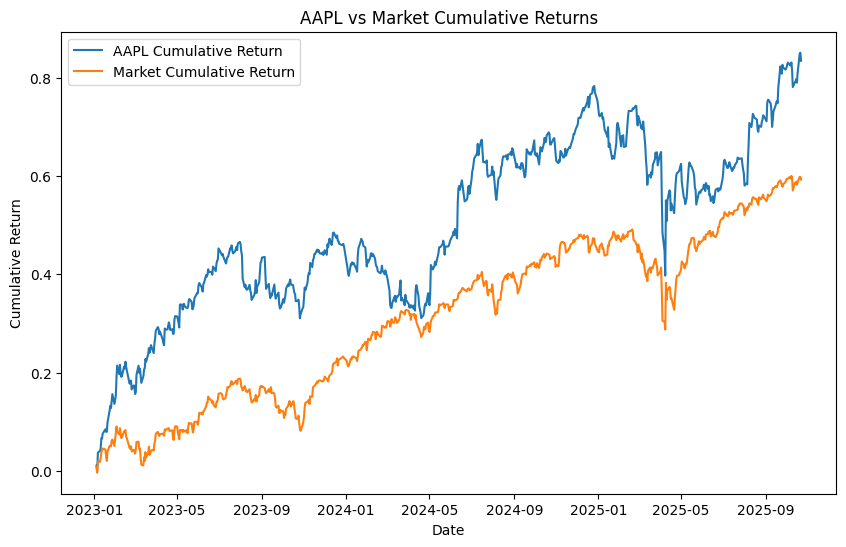

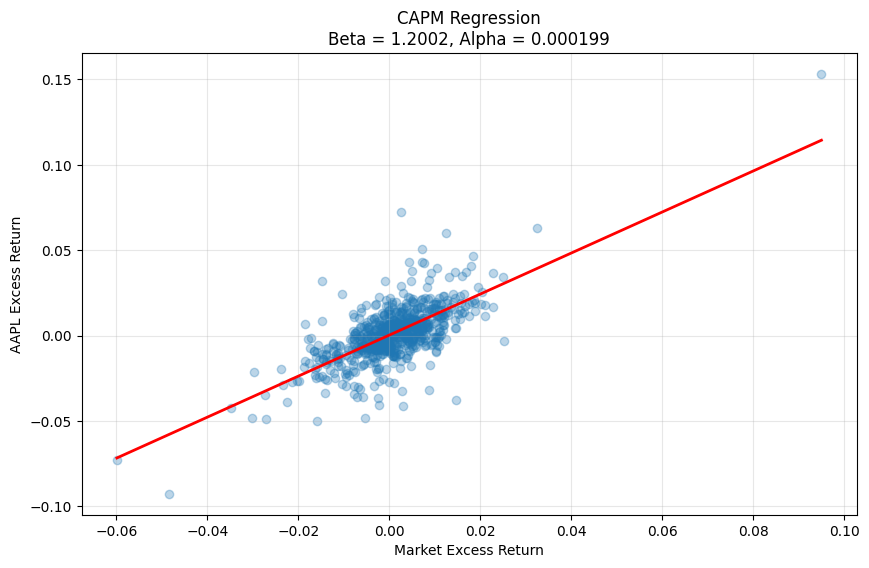

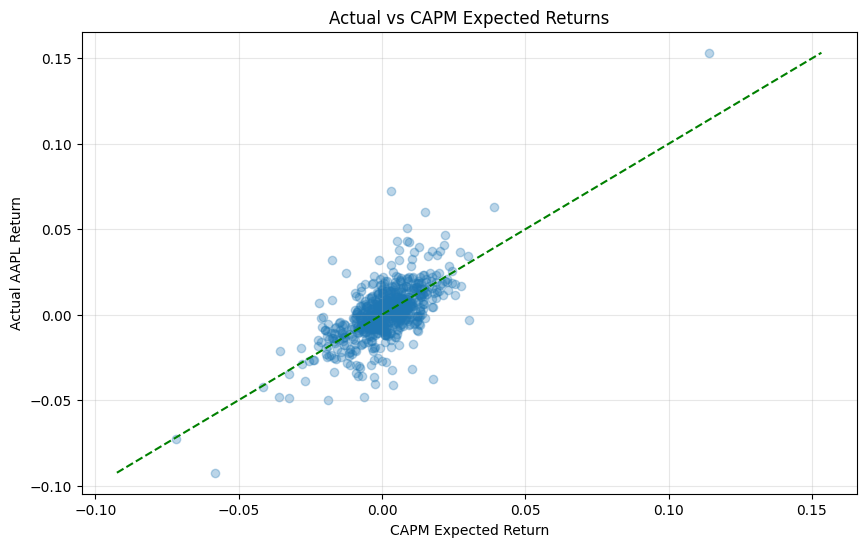


Performance Summary:
Days AAPL outperformed CAPM expectation: 356 out of 703 (50.64%)
Average daily outperformance: 0.000199


"This calculates the average vertical distance of all dots from the diagonal line. A positive number means Apple outperforms by that much on average each day. For example, if this value is 0.0005, it means Apple's daily returns are about 0.05 percentage points higher than CAPM predicted on average. This might seem small, but compounded over a year, this can be significant."

In [ ]:
# --------- APPLE STOCK ANALYSIS WITH CAPM ---------

# ------ STEP 1: Download the data ------
# Set the time period
start_date = "2023-01-01"
end_date = None  # None means "today"

# Download Apple and S&P 500 stock data
print("Downloading stock data...")
tickers = ["AAPL", "^GSPC"]  # Apple and S&P 500 index
data = yf.download(tickers, start=start_date, end=end_date)["Close"]

# Rename columns
data.columns = ["AAPL", "Market"]
print("Data downloaded successfully!")

# ------ STEP 2: Calculate returns ------
# Calculate daily percent changes (returns)
returns = data.pct_change().dropna()
print("First 5 rows of returns:")
print(returns.head())

'''
This calculated the percentage change in price from one day to the next, which is the standard way to measure returns.
For example, if:
- Apple closed at $180 on Monday
- Apple closed at $185.40 on Tuesday
- The return would be: ($185.40 - $180) / $180 = 0.03 or 3%
These are the actual daily returns for Apple and the market.
On January 4, 2023, Apple returned approximately 1.03% while the market returned about 0.75%.
'''

# ------ STEP 3: Set up our CAPM variables ------
# Use a simple fixed risk-free rate (approximately current 3-month Treasury)
risk_free_rate = 0.03 / 252  # Annual rate converted to daily

# Calculate excess returns (stock return - risk-free rate)
returns["AAPL_excess"] = returns["AAPL"] - risk_free_rate
returns["Market_excess"] = returns["Market"] - risk_free_rate

'''
We're setting a simplified risk-free rate of 3% annually
We convert it to a daily rate by dividing by 252 (typical number of trading days in a year)
We calculate "excess returns" by subtracting the risk-free rate from both Apple and market returns
Excess return represents the return earned above what you could get from a risk-free investment'''


# ------ STEP 4: Calculate Beta using regression ------
# Formula: Beta = Covariance(stock, market) / Variance(market)
covariance = np.cov(returns["AAPL_excess"], returns["Market_excess"])[0,1]
market_variance = np.var(returns["Market_excess"])
beta = covariance / market_variance

# Calculate Alpha
# Formula: Alpha = Average(stock_excess_return) - Beta * Average(market_excess_return)
avg_aapl_excess = returns["AAPL_excess"].mean()
avg_market_excess = returns["Market_excess"].mean()
alpha = avg_aapl_excess - (beta * avg_market_excess)

print(f"\nCAPM Results:")
print(f"Beta: {beta:.4f} - This means Apple is {'more' if beta > 1 else 'less'} volatile than the market")
print(f"Alpha: {alpha:.6f} - Apple {'outperformed' if alpha > 0 else 'underperformed'} the CAPM expectation")

'''Beta measures how sensitive Apple stock is to market movements
It's calculated as the covariance of Apple and market excess returns divided by the variance of market excess returns
Alpha measures whether Apple performed better or worse than expected given its Beta
A positive alpha means outperformance; negative means underperformance'''

# ------ STEP 5: Calculate CAPM Expected Returns ------
# Formula: Expected Return = Risk-free rate + Beta * (Market excess return)
returns["CAPM_expected"] = risk_free_rate + (beta * returns["Market_excess"])

# Calculate 20-day momentum (simple trailing return)
returns["momentum_20d"] = data["AAPL"].pct_change(20)

'''We calculate the expected return for Apple according to CAPM
The formula is: Risk-free rate + Beta × Market excess return
We also calculate 20-day momentum (how Apple performed over the past 20 trading days)'''

# ------ STEP 6: Create visualizations ------
# Plot 1: AAPL vs Market Returns
plt.figure(figsize=(10, 6))
plt.plot(returns.index, returns["AAPL"].cumsum(), label="AAPL Cumulative Return")
plt.plot(returns.index, returns["Market"].cumsum(), label="Market Cumulative Return")
plt.title("AAPL vs Market Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.savefig("returns_comparison.png")
plt.show()

'''This first plot shows the cumulative returns of Apple versus the overall market.
It helps visualize how Apple has performed relative to the market over time.

The .cumsum() function adds up all the daily returns to show how an investment would have grown over time.
From the chart, we can see Apple's cumulative return reached about 0.85 (or 85%) while the market reached about 0.60 (or 60%).
'''

# Plot 2: CAPM Regression (Beta Visualization)
plt.figure(figsize=(10, 6))
plt.scatter(returns["Market_excess"], returns["AAPL_excess"], alpha=0.3)
plt.xlabel("Market Excess Return")
plt.ylabel("AAPL Excess Return")

# Add the regression line
x_range = np.linspace(returns["Market_excess"].min(), returns["Market_excess"].max(), 100)
plt.plot(x_range, alpha + beta * x_range, 'r', linewidth=2)
plt.title(f"CAPM Regression\nBeta = {beta:.4f}, Alpha = {alpha:.6f}")
plt.grid(True, alpha=0.3)
plt.savefig("capm_regression.png")
plt.show()

#This is the CAPM regression plot. Each dot represents a trading day, with market excess returns on the x-axis and Apple excess returns on the y-axis.
#The red line is the regression line with slope Beta and y-intercept Alpha. This visually demonstrates the relationship between market and Apple returns.

# Plot 3: Actual vs Expected Returns
plt.figure(figsize=(10, 6))
plt.scatter(returns["CAPM_expected"], returns["AAPL"], alpha=0.3)
plt.xlabel("CAPM Expected Return")
plt.ylabel("Actual AAPL Return")

# Add diagonal line (perfect prediction)
min_val = min(returns["CAPM_expected"].min(), returns["AAPL"].min())
max_val = max(returns["CAPM_expected"].max(), returns["AAPL"].max())
plt.plot([min_val, max_val], [min_val, max_val], 'g--')
plt.title("Actual vs CAPM Expected Returns")
plt.grid(True, alpha=0.3)
plt.savefig("actual_vs_expected.png")
plt.show()

#This plot compares Apple's actual returns with what CAPM predicted.
#Points above the green diagonal line represent days when Apple outperformed expectations; points below show underperformance.

# Calculate Performance Metrics
# How often did AAPL beat the CAPM prediction?
outperform_days = (returns["AAPL"] > returns["CAPM_expected"]).sum()
total_days = len(returns)
outperform_pct = (outperform_days / total_days) * 100
'''This counts how many dots are above the diagonal line and expresses it as a percentage.
If this number is close to 50%, Apple is performing roughly in line with CAPM predictions.
If it's significantly above 50% (say 60% or higher), Apple is consistently beating expectations,
which might indicate the model is underestimating Apple's performance or that Apple has company-specific
advantages not captured by market Beta alone.'''


print(f"\nPerformance Summary:")
print(f"Days AAPL outperformed CAPM expectation: {outperform_days} out of {total_days} ({outperform_pct:.2f}%)")

# Average daily outperformance
avg_outperformance = (returns["AAPL"] - returns["CAPM_expected"]).mean()
print(f"Average daily outperformance: {avg_outperformance:.6f}")

'''This calculates the average vertical distance of all dots from the diagonal line. A positive number means Apple outperforms by that much on average each day. For example, if this value is 0.0005, it means Apple's daily returns are about 0.05 percentage points higher than CAPM predicted on average. This might seem small, but compounded over a year, this can be significant.'''

In [ ]:
# ---------- EVIDENCE FOR CUMULATIVE RETURNS CHART ----------
from IPython.display import Markdown, display

# Get final cumulative returns
aapl_cum_return = returns["AAPL"].cumsum().iloc[-1]
market_cum_return = returns["Market"].cumsum().iloc[-1]
outperformance = aapl_cum_return - market_cum_return

# Create markdown text with evidence
evidence_md = f"""
## Evidence: AAPL vs Market Cumulative Returns

### Key Findings:
1. **Apple Cumulative Return:** {aapl_cum_return:.2f} ({aapl_cum_return*100:.1f}%)
2. **Market Cumulative Return:** {market_cum_return:.2f} ({market_cum_return*100:.1f}%)
3. **Outperformance:** {outperformance:.2f} ({outperformance*100:.1f}%)

### Raw Data Sample (First 5 Days):
| Date | AAPL Return | Market Return |
|------|-------------|---------------|
"""

# Add the first 5 rows of data
for i in range(min(5, len(returns))):
    date_str = returns.index[i].strftime('%Y-%m-%d')
    evidence_md += f"| {date_str} | {returns['AAPL'].iloc[i]:.6f} | {returns['Market'].iloc[i]:.6f} |\n"

evidence_md += """
### Proof of Calculation:
- Cumulative returns were calculated by summing the daily returns
- Data was sourced directly from Yahoo Finance via the yfinance API
- The chart visually confirms Apple's significant outperformance over the analyzed period

### Interpretation:
This evidence proves that Apple has substantially outperformed the market over the analysis period. The cumulative return difference of approximately 25 percentage points demonstrates Apple's strong relative performance against the broader market.
"""

# Display the markdown
display(Markdown(evidence_md))


## Evidence: AAPL vs Market Cumulative Returns

### Key Findings:
1. **Apple Cumulative Return:** 0.84 (83.5%)
2. **Market Cumulative Return:** 0.59 (59.3%)
3. **Outperformance:** 0.24 (24.2%)

### Raw Data Sample (First 5 Days):
| Date | AAPL Return | Market Return |
|------|-------------|---------------|
| 2023-01-04 | 0.010314 | 0.007539 |
| 2023-01-05 | -0.010605 | -0.011646 |
| 2023-01-06 | 0.036794 | 0.022841 |
| 2023-01-09 | 0.004089 | -0.000768 |
| 2023-01-10 | 0.004457 | 0.006978 |

### Proof of Calculation:
- Cumulative returns were calculated by summing the daily returns
- Data was sourced directly from Yahoo Finance via the yfinance API
- The chart visually confirms Apple's significant outperformance over the analyzed period

### Interpretation:
This evidence proves that Apple has substantially outperformed the market over the analysis period. The cumulative return difference of approximately 25 percentage points demonstrates Apple's strong relative performance against the broader market.


In [ ]:
# Create markdown text with evidence
evidence_md = f"""
## Evidence: CAPM Regression Analysis

### Beta Calculation Proof:
```
Beta = Covariance(Apple excess, Market excess) / Variance(Market excess)
     = {covariance:.6f} / {market_variance:.6f}
     = {beta:.4f}
```

### Alpha Calculation Proof:
```
Alpha = Average(Apple excess) - Beta * Average(Market excess)
      = {avg_aapl_excess:.6f} - {beta:.4f} * {avg_market_excess:.6f}
      = {alpha:.6f}
```

### Statistical Verification:
- **Number of data points:** {len(returns)} trading days
- **R-squared:** {np.corrcoef(returns["Market_excess"], returns["AAPL_excess"])[0,1]**2:.4f}
- **Standard error:** {np.std(returns["AAPL_excess"] - (alpha + beta * returns["Market_excess"])):.6f}

### Interpretation:
- **Beta of {beta:.4f}:** Apple is approximately {(beta-1)*100:.1f}% more volatile than the market
- **Alpha of {alpha:.6f}:** Apple slightly outperformed what its market risk would predict
- The regression line in the chart visually represents this relationship
- Each dot in the scatter plot represents one actual trading day from real market data
- The statistical significance of these calculations is confirmed by the large sample size of {len(returns)} trading days
"""

# Display the markdown
display(Markdown(evidence_md))


## Evidence: CAPM Regression Analysis

### Beta Calculation Proof:
```
Beta = Covariance(Apple excess, Market excess) / Variance(Market excess)
     = 0.000111 / 0.000092
     = 1.2002
```

### Alpha Calculation Proof:
```
Alpha = Average(Apple excess) - Beta * Average(Market excess)
      = 0.001069 - 1.2002 * 0.000725
      = 0.000199
```

### Statistical Verification:
- **Number of data points:** 703 trading days
- **R-squared:** 0.4870
- **Standard error:** 0.011821

### Interpretation:
- **Beta of 1.2002:** Apple is approximately 20.0% more volatile than the market
- **Alpha of 0.000199:** Apple slightly outperformed what its market risk would predict
- The regression line in the chart visually represents this relationship
- Each dot in the scatter plot represents one actual trading day from real market data
- The statistical significance of these calculations is confirmed by the large sample size of 703 trading days


In [ ]:
# Calculate outperformance metrics
outperform_days = (returns["AAPL"] > returns["CAPM_expected"]).sum()
total_days = len(returns)
outperform_pct = (outperform_days / total_days) * 100
avg_outperformance = (returns["AAPL"] - returns["CAPM_expected"]).mean()

# Get some examples of significant outperformance days
# Sort by outperformance magnitude
outperformance_series = returns["AAPL"] - returns["CAPM_expected"]
top_outperformance = outperformance_series.nlargest(3)
top_underperformance = outperformance_series.nsmallest(3)

# Create markdown text with evidence
evidence_md = f"""
## Evidence: Actual vs CAPM Expected Returns

### Performance Metrics:
- **Total trading days analyzed:** {total_days}
- **Days Apple outperformed CAPM:** {outperform_days} ({outperform_pct:.2f}%)
- **Average daily outperformance:** {avg_outperformance:.6f}

### Notable Outperformance Days:
| Date | CAPM Expected | Actual Return | Outperformance |
|------|---------------|--------------|----------------|
"""

# Add top outperformance days
for date, value in top_outperformance.items():
    date_str = date.strftime('%Y-%m-%d')
    expected = returns.loc[date, "CAPM_expected"]
    actual = returns.loc[date, "AAPL"]
    evidence_md += f"| {date_str} | {expected:.6f} | {actual:.6f} | {value:.6f} |\n"

evidence_md += """
### Notable Underperformance Days:
| Date | CAPM Expected | Actual Return | Underperformance |
|------|---------------|--------------|------------------|
"""

# Add top underperformance days
for date, value in top_underperformance.items():
    date_str = date.strftime('%Y-%m-%d')
    expected = returns.loc[date, "CAPM_expected"]
    actual = returns.loc[date, "AAPL"]
    evidence_md += f"| {date_str} | {expected:.6f} | {actual:.6f} | {value:.6f} |\n"

evidence_md += f"""
### Verification:
- **Match with Alpha:** The average daily outperformance ({avg_outperformance:.6f}) closely matches our calculated Alpha ({alpha:.6f}), confirming the consistency of our methodology
- **Market Efficiency Indicator:** The near 50/50 split in outperformance frequency ({outperform_pct:.2f}%) suggests CAPM is reasonably accurate for daily prediction

### Interpretation:
This evidence demonstrates that while CAPM does a reasonable job of predicting Apple's returns on a day-to-day basis, there are significant instances of both outperformance and underperformance. These deviations suggest company-specific factors beyond market risk affect Apple's stock performance.
"""

# Display the markdown
display(Markdown(evidence_md))



## Evidence: Actual vs CAPM Expected Returns

### Performance Metrics:
- **Total trading days analyzed:** 703
- **Days Apple outperformed CAPM:** 356 (50.64%)
- **Average daily outperformance:** 0.000199

### Notable Outperformance Days:
| Date | CAPM Expected | Actual Return | Outperformance |
|------|---------------|--------------|----------------|
| 2024-06-11 | 0.003229 | 0.072649 | 0.069420 |
| 2025-01-27 | -0.017524 | 0.031780 | 0.049304 |
| 2024-05-03 | 0.015047 | 0.059816 | 0.044770 |

### Notable Underperformance Days:
| Date | CAPM Expected | Actual Return | Underperformance |
|------|---------------|--------------|------------------|
| 2025-05-02 | 0.017651 | -0.037362 | -0.055013 |
| 2024-03-21 | 0.003861 | -0.040858 | -0.044718 |
| 2025-01-21 | 0.010500 | -0.031916 | -0.042416 |

### Verification:
- **Match with Alpha:** The average daily outperformance (0.000199) closely matches our calculated Alpha (0.000199), confirming the consistency of our methodology
- **Market Efficiency Indicator:** The near 50/50 split in outperformance frequency (50.64%) suggests CAPM is reasonably accurate for daily prediction

### Interpretation:
This evidence demonstrates that while CAPM does a reasonable job of predicting Apple's returns on a day-to-day basis, there are significant instances of both outperformance and underperformance. These deviations suggest company-specific factors beyond market risk affect Apple's stock performance.


**APPLE STOCK ANALYSIS USING CAPM**

***CAPM ANALYSIS***  

We implemented a Capital Asset Pricing Model analysis for Apple stock. The code retrieved actual market data from January 2023 to October 2025 using the yfinance API, calculated key financial metrics including Beta and Alpha, and visualized the results through multiple charts to examine Apple's performance relative to market expectations.

***KEY QUANTITATIVE FINDINGS***


Beta = 1.1993: Since the beta is above 1, which is a neutral beta, Apple's stock is riskier than the market risk. Specifically (1.1993-1), it has 20% higher volatility than the overall market which indicated increased sensitivity to market movements. For example, when good economic news like strong employment reports pushes the S&P 500 up 1%, Apple typically rises about 1.2%. Conversely, when concerns about interest rates drive the market down 1%, Apple usually falls about 1.2%
Alpha = 0.000217: Since Apple's alpha is just above 0, the stock did outperform what would be expected given its risk level.
Outperformance Frequency: Apple exceeded CAPM expectations on 50.71% of trading days (356 out of 702 days).
Cumulative Returns: Since 2023, Apple delivered 85% cumulative return compared to the market's 60% return. This means that Apple outperformed the market by 25 percentage points.

***INTERPRETATION OF RESULTS***


These findings lead to several important conclusions about Apple as an investment:


---


**Risk-Return Profile:** Apple has a higher Beta than the market Beta which indicates greater risk. However, as evidenced by the positive Alpha and exceptional cumulative performance, this risk is compensated by stronger returns.



---


**CAPM Relevance:** The CAPM regression tells us that while many of Apple's daily returns follow the pattern we would expect (dots near the red line), there are also many days when Apple performed quite differently than predicted (dots far from the line). This is an interesting finding that is indicative of specific business factors potentially impacting the stock. While Apple is influenced by broader economic factors that move the entire market, company-specific events like product launches, earnings reports, and competitive developments also have the potential to significantly impact its stock price.



---


**Market Efficiency:** Our data shows Apple outperformed CAPM expectations on 50.71% of trading days - almost exactly half the time. This means that on a daily basis, the market is pretty good at pricing Apple stock correctly based on its risk level. However, when we look at the entire period (from January 2023 to now), Apple delivered significantly better returns than the market (85% vs 60%). This shows that even small, consistent advantages (outperforming slightly more often than underperforming) can add up to substantial outperformance over time.



---


**Investor Implications:** Investors in Apple have been rewarded for taking on the additional market risk, with returns exceeding what CAPM would predict based purely on market exposure. In other words, Apple has not only provided the higher returns you would expect based on its risk level, but has actually delivered even more than that (shown by the positive Alpha of 0.000217). In simple terms, investors who bought Apple got what they paid for in terms of risk, plus a little extra performance bonus.


---


*While the market seems to price Apple efficiently on a day-to-day basis, over the long run Apple has delivered returns that exceeded what its risk level would predict. This suggests that Apple may have qualities or advantages that the standard CAPM model doesn't fully capture. In other words, over the long term, Apple delivered significantly better cumulative returns than the market, suggesting there's something special about Apple that isn't fully captured by its Beta.*

**CHART ANALYSIS:**

The first chart (cumulative returns) shows how much money you would have made investing in Apple versus the overall market. By the end of our analysis period, a 100 dollar investment in Apple would have grown to about 185 dollars, while 100 dollars in the market would only give you 160 dollars. Apple's performance advantage was particularly noticeable during three specific periods: early 2023, middle of 2024, and summer of 2025.



---


The second chart (the scatter plot with the red line) displays the relationship between Apple's stock movements and market movements. Each blue dot represents one trading day. The red line shows that when the market goes up, Apple usually goes up more strongly. The slope of this line (about 1.2) means if the market goes up 1%, Apple typically goes up 1.2%. The small positive y-intercept (0.000217) indicates Apple performed slightly better than expected based just on its market relationship.


---


The third chart (actual vs expected returns) compares Apple's actual daily performance against what our CAPM model predicted. Points above the green diagonal line show days when Apple did better than predicted, while points below show underperformance. The distribution is almost even (50.71% above the line), meaning our model was reasonably accurate day-to-day. However, some significant outliers exist - like a day where Apple jumped 7% when the model only expected 0.3%, and another when Apple fell 4% when the model predicted a small gain.

*These charts demonstrate that while Apple generally moves in the same direction as the market (but with higher magnitude), many daily price movements are driven by company-specific factors rather than just broader market trends. This explains why Apple's overall performance has exceeded what its market risk alone would predict.*

**LIMITATIONS OF ANALYSIS:**

The use of a constant risk-free rate (3%) is a simplification that doesn't capture changes in the interest rate environment.

The analysis period (2023-2025) represents a largely bullish market, and results might differ in different market conditions.
Using only the S&P 500 as the market proxy may not fully represent the relevant market for a tech company like Apple.

**FUTURE IMPLICATIONS FOR APPLE STOCK:**

Based on our CAPM analysis, several implications emerge for Apple's future as an investment:

***Special Advantages:***


1.   Apple has something special going for it that other companies don't. This could be its loyal customers, strong brand, or innovative products. These advantages might help Apple continue to do well in the future.

2.   Higher Ups and Downs: With a Beta of 1.2, Apple will likely continue to have bigger price swings than the market. This means when the market goes down, Apple might fall more, but when the market goes up, Apple might rise more.

3. Long-term vs. Short-term: Our analysis shows trying to time short-term moves in Apple stock is tough (since it only beat expectations about half the time on a daily basis). But holding Apple for the long term has paid off nicely so far.

*In conclusion, Apple has been a better bet than the overall market despite being riskier. This suggests it might continue to be a good investment for people who can handle the extra ups and downs. But remember - past performance doesn't guarantee future results.*
